# <font color='green'>Homework 3</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2023<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Importing Required Packages and Classes</span>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import classification_report

# <span style="color:purple">Question 7</span>

In [ ]:
circle_x = 0
circle_y = 0
circle1_r1 = 1.3
circle1_r2 = 1.6
circle2_r = 1
num_of_points = 100

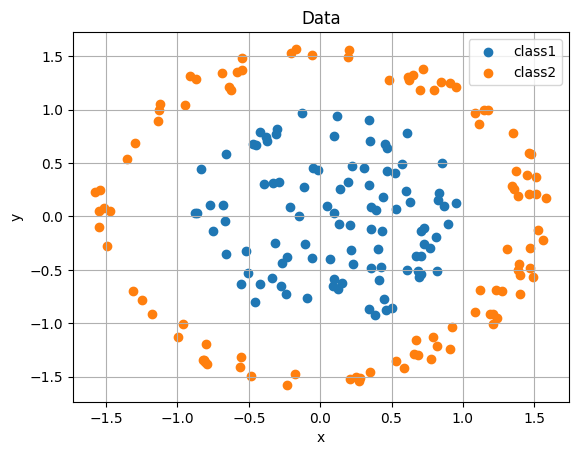

In [ ]:
class1_x = []
class1_y = []
class2_x = []
class2_y = []
for i in range(num_of_points):
    alpha = 2 * math.pi * random.random()
    r = (circle1_r2 - circle1_r1) * math.sqrt(random.random()) + circle1_r1
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    class2_x.append(x)
    class2_y.append(y)
    r = (circle2_r) * math.sqrt(random.random())
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y
    class1_x.append(x)
    class1_y.append(y)

plt.title('Data')
plt.scatter(class1_x, class1_y, label='class1')
plt.scatter(class2_x, class2_y, label='class2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def find_separation_line(start,end,w,b):
    x= np.linspace(start,end)
    y = -(w[0] * x + b)
    y = y / w[1]
    return x,y

In [ ]:
def initialize(k,d1,d2):
    np.random.seed(10)
    w = np.random.rand(d1,d2) * k
    b = np.zeros((d1,1))
    v = np.array([[1]*d1])
    b3 = d1 - 1
    return w,b,v,b3

In [ ]:
def activation(net):
    h = np.where(net >= 0, 1, -1)
    return h

In [ ]:
def forward(w,x,b,resh):
    if resh:
        x = x.reshape((2,1))
    z_in = np.dot(w,x) + b
    z = activation(z_in)
    return z_in, z

In [ ]:
def update(w,b,x,t,z_in,y,alpha,d1):
   
    x = x.reshape((1,2))
    z_in = z_in.reshape((d1,1))
    if t == y:
        return w,b
    
    elif t == 1 and t!=y:    #y=-1 but t=1
        argmax_neuron = np.argmax(z_in)
        diff_b = alpha * (1- z_in[argmax_neuron])
        diff_w = alpha * np.dot((1-z_in[argmax_neuron]),x)
        b[argmax_neuron] = b[argmax_neuron] + diff_b
        w[argmax_neuron] = w[argmax_neuron] + diff_w

    elif t == -1 and t !=y:   # y=1 but t=-1
        z_pos = np.argwhere(z_in > 0)
        diff_b = alpha * (-1- z_in)
        diff_w = alpha * np.dot((-1-z_in),x)
        bt = b + diff_b
        wt = w + diff_w
        for i in z_pos[:,0]:
            w[i] = wt[i]
            b[i] = bt[i]
        
    return w,b

In [ ]:
def calculate_error(t,y):
    e = 0.5 * np.power((t - y),2)
    return e

In [ ]:
def predict(x, t,w,b,d1):
    y_hat = []
    b3 = np.zeros((d1,1))
    v = np.array([[1]*d1])
    b3 = d1 - 1
    for i in range(x.shape[0]):
        z_in, z = forward(w,x[i],b,resh = True)
        y_in, y = forward(v,z,b3,resh = False)
        y_hat.append(y[0])
    return y_hat

In [ ]:
def MR1(x,t,d1,d2,learning_rate,max_iter,samples):
    print('sample:',samples)
    k = 0.001
    error_list = []
    errors = []
    mean_error = 10**3
    w,b,v,b3 = initialize(k,d1,d2)  #Step0
    for i in range(max_iter):
        z_in, z = forward(w,x[i%samples],b,resh = True) #Step 4 and 5
        y_in, y = forward(v,z,b3,resh = False) #Step 6
        error = calculate_error(t[i%samples],y)
        errors.append(error)
        if i % samples == 0 and i != 0:
            mean_error = np.mean(errors)
            error_list.append(mean_error)
            errors = []
            print('Epoch %d / %d' % (len(error_list), int(max_iter/samples)))
            print('loss:', mean_error)
        '''
        if mean_error == 0 or (i> 50 and error_list[len(error_list)-1] - error_list[len(error_list)-2]):
            print('An early stop occurred!')
            return w,b, error_list
        '''
        w,b = update(w,b,x[i%samples],t[i%samples],z_in,y,learning_rate,d1) #Step 7
    return w,b,error_list

In [ ]:
classes_x = class1_x + class2_x
classes_y = class1_y + class2_y
labels = [0]*num_of_points + [1]*num_of_points
X = np.array(list(zip(classes_x, classes_y)))

raw_data = {'x1': classes_x,
            'x2': classes_y,
            'label': labels,
           }
df = pd.DataFrame(raw_data, columns=['x1', 'x2', 'label'])

print(df)

f = df[['x1','x2']]
x = f.to_numpy()

label = df[['label']]
t = label.to_numpy()
t[np.isclose(t, 0)] = -1

           x1        x2  label
0   -0.317638 -0.247312      0
1   -0.423997 -0.629710      0
2   -0.753208 -0.137092      0
3   -0.291569  0.321283      0
4   -0.458528 -0.799280      0
..        ...       ...    ...
195  0.192951  1.491288      1
196 -0.201814  1.525303      1
197 -1.133732  0.888807      1
198 -0.962591 -1.003452      1
199 -0.054241  1.507721      1

[200 rows x 3 columns]


In [ ]:
w, b, error_list = MR1(x,t,d1 =3 ,d2 = 2,max_iter = 200*200,learning_rate = 0.0001,samples = x.shape[0])

sample: 200
Epoch 1 / 200
loss: 0.15920398009950248
Epoch 2 / 200
loss: 0.06
Epoch 3 / 200
loss: 0.06
Epoch 4 / 200
loss: 0.06
Epoch 5 / 200
loss: 0.06
Epoch 6 / 200
loss: 0.06
Epoch 7 / 200
loss: 0.07
Epoch 8 / 200
loss: 0.11
Epoch 9 / 200
loss: 0.09
Epoch 10 / 200
loss: 0.08
Epoch 11 / 200
loss: 0.07
Epoch 12 / 200
loss: 0.07
Epoch 13 / 200
loss: 0.11
Epoch 14 / 200
loss: 0.11
Epoch 15 / 200
loss: 0.11
Epoch 16 / 200
loss: 0.1
Epoch 17 / 200
loss: 0.09
Epoch 18 / 200
loss: 0.11
Epoch 19 / 200
loss: 0.11
Epoch 20 / 200
loss: 0.1
Epoch 21 / 200
loss: 0.1
Epoch 22 / 200
loss: 0.1
Epoch 23 / 200
loss: 0.09
Epoch 24 / 200
loss: 0.07
Epoch 25 / 200
loss: 0.09
Epoch 26 / 200
loss: 0.08
Epoch 27 / 200
loss: 0.08
Epoch 28 / 200
loss: 0.08
Epoch 29 / 200
loss: 0.08
Epoch 30 / 200
loss: 0.07
Epoch 31 / 200
loss: 0.08
Epoch 32 / 200
loss: 0.1
Epoch 33 / 200
loss: 0.09
Epoch 34 / 200
loss: 0.09
Epoch 35 / 200
loss: 0.09
Epoch 36 / 200
loss: 0.11
Epoch 37 / 200
loss: 0.11
Epoch 38 / 200
loss: 0.09

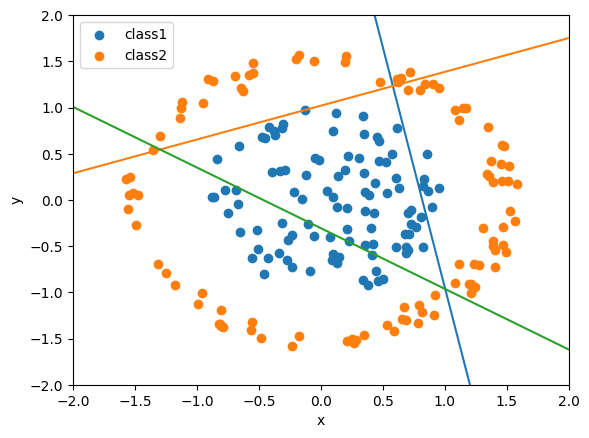

In [ ]:
p1x1,p1x2 = find_separation_line(-2,2,w[0],b[0])
p2x1,p2x2 = find_separation_line(-2,2,w[1],b[1])
p3x1,p3x2 = find_separation_line(-2,2,w[2],b[2])

plt.scatter(class1_x, class1_y, label='class1')
plt.scatter(class2_x, class2_y, label='class2')
plt.plot(p1x1,p1x2)
plt.plot(p2x1,p2x2)
plt.plot(p3x1,p3x2)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(["class1" , "class2"])

plt.xlim([-2, 2])
plt.ylim([-2, 2])
 
plt.show()

In [ ]:
y_hat = predict(x, t,w,b,d1=3)
print(classification_report(t, y_hat))

              precision    recall  f1-score   support

          -1       1.00      0.62      0.77       100
           1       0.72      1.00      0.84       100

    accuracy                           0.81       200
   macro avg       0.86      0.81      0.80       200
weighted avg       0.86      0.81      0.80       200



In [ ]:
w,b, error_list = MR1(x,t,d1 = 6 ,d2 = 2,max_iter = 200*200,learning_rate = 0.01,samples = x.shape[0])

sample: 200
Epoch 1 / 200
loss: 0.06965174129353234
Epoch 2 / 200
loss: 0.07
Epoch 3 / 200
loss: 0.08
Epoch 4 / 200
loss: 0.1
Epoch 5 / 200
loss: 0.07
Epoch 6 / 200
loss: 0.08
Epoch 7 / 200
loss: 0.08
Epoch 8 / 200
loss: 0.09
Epoch 9 / 200
loss: 0.09
Epoch 10 / 200
loss: 0.08
Epoch 11 / 200
loss: 0.05
Epoch 12 / 200
loss: 0.07
Epoch 13 / 200
loss: 0.08
Epoch 14 / 200
loss: 0.06
Epoch 15 / 200
loss: 0.05
Epoch 16 / 200
loss: 0.04
Epoch 17 / 200
loss: 0.03
Epoch 18 / 200
loss: 0.04
Epoch 19 / 200
loss: 0.04
Epoch 20 / 200
loss: 0.03
Epoch 21 / 200
loss: 0.03
Epoch 22 / 200
loss: 0.05
Epoch 23 / 200
loss: 0.05
Epoch 24 / 200
loss: 0.07
Epoch 25 / 200
loss: 0.06
Epoch 26 / 200
loss: 0.05
Epoch 27 / 200
loss: 0.03
Epoch 28 / 200
loss: 0.02
Epoch 29 / 200
loss: 0.03
Epoch 30 / 200
loss: 0.02
Epoch 31 / 200
loss: 0.02
Epoch 32 / 200
loss: 0.02
Epoch 33 / 200
loss: 0.02
Epoch 34 / 200
loss: 0.01
Epoch 35 / 200
loss: 0.0
Epoch 36 / 200
loss: 0.0
Epoch 37 / 200
loss: 0.0
Epoch 38 / 200
loss: 0.0

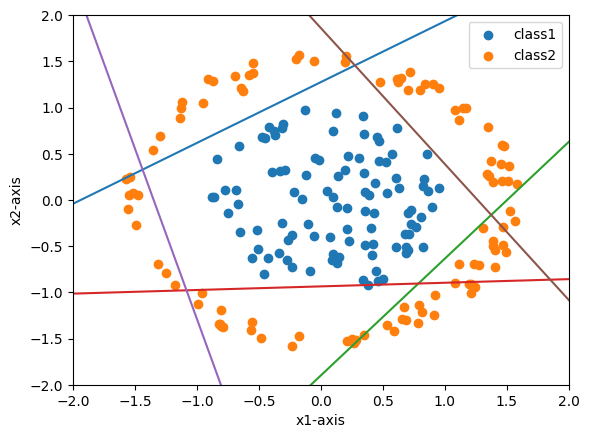

In [ ]:
p1x1,p1x2 = find_separation_line(-2,2,w[0],b[0])
p2x1,p2x2 = find_separation_line(-2,2,w[1],b[1])
p3x1,p3x2 = find_separation_line(-2,2,w[2],b[2])
p4x1,p4x2 = find_separation_line(-2,2,w[3],b[3])
p5x1,p5x2 = find_separation_line(-2,2,w[4],b[4])
p6x1,p6x2 = find_separation_line(-2,2,w[5],b[5])

plt.scatter(class1_x, class1_y, label='class1')
plt.scatter(class2_x, class2_y, label='class2')
plt.plot(p1x1,p1x2)
plt.plot(p2x1,p2x2)
plt.plot(p3x1,p3x2)
plt.plot(p4x1,p4x2)
plt.plot(p5x1,p5x2)
plt.plot(p6x1,p6x2)

plt.xlabel("x1-axis")
plt.ylabel("x2-axis")
plt.legend(["class1" , "class2"])
plt.xlim([-2,2])
plt.ylim([-2, 2])
plt.show()


In [ ]:
y_hat = predict(x, t,w,b,d1=6)
print(classification_report(t, y_hat))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

